<a href="https://colab.research.google.com/github/varnitha1206/Classification-of-Suicidal-Ideation-and-Behaviour/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("data.csv")
data

,Gender,Race,Age,Marital_status,Employment status,Pychiatric disorders,Connectedness to Family and friends,Hopelessness,Suicidal thoughts
0,Female,Mixed race,35.0,Single,Employed,Depression,5.0,2.0,Yes
1,Female,White non-Hispanic,21.0,Married,Employed,Unidentified,6.0,1.0,No
2,Male,White non-Hispanic,22.0,Divorced/Separated,Employed,Depression,7.0,3.0,No
3,Male,White non-Hispanic,NaN,Widowed,Employed,Depression,1.0,4.0,Yes
4,Male,Asian,23.0,Other/Unknown,Unemployed,Schizophrenias,4.0,2.0,Yes
...,...,...,...,...,...,...,...,...,...
195,Female,White non-Hispanic,32.0,Widowed,Employed,Schizophrenias,5.0,2.0,Yes
196,Male,White non-Hispanic,21.0,Other/Unknown,unknown,Depression,2.0,3.0,Yes
197,Male,Black,21.0,Single,Employed,Depression,5.0,4.0,No
198,Male,Hispanic (of any race),21.0,Single,Employed,Schizophrenias,2.0,2.0,Yes


In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1:].values
print(X)
print(y)

[['Female' 'Mixed race' 35.0 ... 'Depression' 5.0 2.0]
 ['Female' 'White non-Hispanic' 21.0 ... 'Unidentified' 6.0 1.0]
 ['Male' 'White non-Hispanic' 22.0 ... 'Depression' 7.0 3.0]
 ...
 ['Male' 'Black' 21.0 ... 'Depression' 5.0 4.0]
 ['Male' 'Hispanic (of any race)' 21.0 ... 'Schizophrenias' 2.0 2.0]
 ['Female' 'Hispanic (of any race)' 16.0 ... 'Depression' 3.0 1.0]]
[['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']


In [ ]:
from sklearn.impute import SimpleImputer
print(type(X))
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,[2,6,7]])
X[:,[2,6,7]]=imputer.transform(X[:,[2,6,7]])
print(X[:,[2,6,7]])
print(X[:,0])

<class 'numpy.ndarray'>
[[35.0 5.0 2.0]
 [21.0 6.0 1.0]
 [22.0 7.0 3.0]
 [23.55440414507772 1.0 4.0]
 [23.0 4.0 2.0]
 [24.0 2.0 4.0]
 [22.0 6.0 2.0]
 [24.0 4.0 3.0]
 [20.0 3.703125 4.0]
 [33.0 7.0 3.0]
 [32.0 5.0 1.0]
 [25.0 6.0 3.0]
 [24.0 1.0 4.0]
 [23.0 3.0 2.0]
 [22.0 5.0 1.0]
 [23.55440414507772 3.703125 1.0]
 [29.0 3.0 3.0]
 [21.0 1.0 2.0]
 [17.0 2.0 3.0]
 [29.0 5.0 2.0]
 [32.0 4.0 1.0]
 [20.0 6.0 4.0]
 [24.0 3.703125 1.0]
 [20.0 5.0 4.0]
 [21.0 7.0 1.0]
 [17.0 3.0 2.0]
 [24.0 1.0 1.0]
 [17.0 4.0 4.0]
 [28.0 2.0 2.0]
 [19.0 4.0 2.0]
 [17.0 2.0 4.0]
 [23.55440414507772 4.0 2.4166666666666665]
 [17.0 5.0 3.0]
 [23.0 3.0 1.0]
 [26.0 1.0 3.0]
 [26.0 5.0 1.0]
 [23.0 2.0 4.0]
 [25.0 6.0 2.0]
 [18.0 3.0 2.4166666666666665]
 [19.0 1.0 3.0]
 [19.0 7.0 1.0]
 [55.0 4.0 2.0]
 [35.0 2.0 3.0]
 [24.0 1.0 4.0]
 [22.0 4.0 1.0]
 [23.0 5.0 2.0]
 [20.0 2.0 1.0]
 [25.0 1.0 3.0]
 [18.0 5.0 4.0]
 [29.0 6.0 2.0]
 [24.0 3.703125 4.0]
 [23.0 1.0 2.0]
 [23.55440414507772 3.0 3.0]
 [25.0 4.0 4.0]
 [18.0 2.0

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# cl=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4,5])], remainder='passthrough')
# X=cl.fit_transform(X).toarray()
# x=np.asarray(X).reshape(())
print(np.unique(X[:,1]))
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])
# print(np.shape(X)[1])
print(np.unique(X[:,0]),np.unique(X[:,1]),np.unique(X[:,3]),np.unique(X[:,4]),np.unique(X[:,5]))
print(X[:,:])
# for the output variables
y=le.fit_transform(y)
print(y)

['Asian' 'Black' 'Half Asian half white' 'Hispanic (of any race)' 'Indian'
 'Middle Eastern' 'Mixed' 'Mixed race' 'Multi' 'Native American mix'
 'Native american' 'North African' 'Pakistani' 'Turkish'
 'White non-Hispanic' 'helicopterkin' 'indian']
[0 1 2 3 4] [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16] [0 1 2 3 4 5] [0 1 2 3] [0 1 2]
[[0 7 35.0 ... 0 5.0 2.0]
 [0 14 21.0 ... 2 6.0 1.0]
 [1 14 22.0 ... 0 7.0 3.0]
 ...
 [1 1 21.0 ... 0 5.0 4.0]
 [1 3 21.0 ... 1 2.0 2.0]
 [0 3 16.0 ... 0 3.0 1.0]]
[1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X[0,:]

array([0, 7, 35.0, 3, 0, 0, 5.0, 2.0], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train,y_train)

[[1 14 30.0 ... 2 5.0 1.0]
 [1 14 23.55440414507772 ... 2 6.0 1.0]
 [1 14 29.0 ... 0 4.0 2.0]
 ...
 [1 3 15.0 ... 2 2.0 4.0]
 [1 0 25.0 ... 0 1.0 3.0]
 [1 14 33.0 ... 0 1.0 4.0]] [1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1]


In [ ]:
print(X_train[0,:])
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,[2,6,7]]=sc.fit_transform(X_train[:,[2,6,7]])
X_test[:,[2,6,7]]=sc.transform(X_test[:,[2,6,7]])
print(X_train[0,:])

[1 14 30.0 3 0 2 5.0 1.0]
[1 14 1.044413800472617 3 0 2 0.7604366265121909 -1.360747848787983]


In [ ]:
# Decision Tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

[Text(167.4, 181.2, 'X[6] <= 0.488\ngini = 0.499\nsamples = 140\nvalue = [67, 73]'),
 Text(83.7, 108.72, 'X[5] <= 1.5\ngini = 0.454\nsamples = 89\nvalue = [31, 58]'),
 Text(41.85, 36.23999999999998, 'gini = 0.31\nsamples = 47\nvalue = [9, 38]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.499\nsamples = 42\nvalue = [22, 20]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 0.959\ngini = 0.415\nsamples = 51\nvalue = [36, 15]'),
 Text(209.25, 36.23999999999998, 'gini = 0.32\nsamples = 40\nvalue = [32, 8]'),
 Text(292.95, 36.23999999999998, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]')]

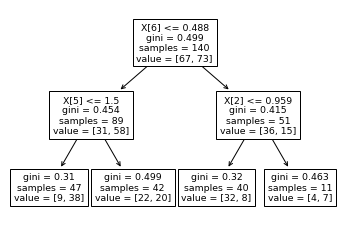

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifier)

In [ ]:
features=[]
for i in data.columns[:-1]:
  features.append(i)
print(features)

['Gender', 'Race', 'Age', 'Marital_status', 'Employment status', 'Pychiatric disorders', 'Connectedness to Family and friends', 'Hopelessness']


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    classifier,
    out_file='tree.dot',
    feature_names=features ,
    class_names=["Yes","No"],
    rounded=True,
    filled=True)

In [ ]:
%ls

data.csv  sample_data/  tree.dot  tree.png


In [ ]:
! dot -Tpng tree.dot -o tree.png

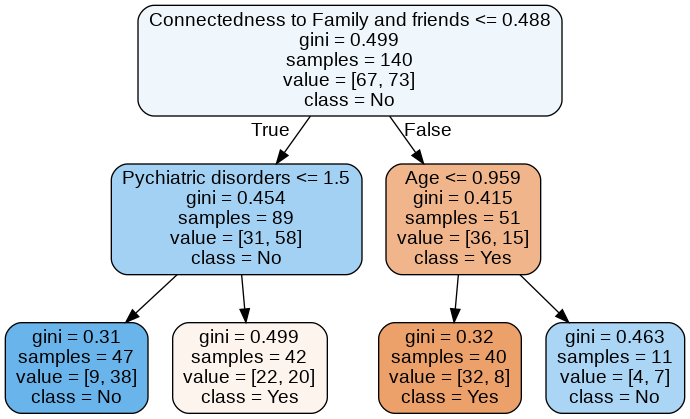

In [ ]:
from IPython.display import Image
Image (filename='tree.png')

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.55


In [ ]:
classifier2=tree.DecisionTreeClassifier(max_depth=4)
classifier2.fit(X_train,y_train)
predictions2=classifier2.predict(X_test)
predictions2

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    classifier2,
    out_file='tree.dot',
    feature_names=features ,
    class_names=["Yes","No"],
    rounded=True,
    filled=True)

data.csv  sample_data/  tree.dot  tree.png


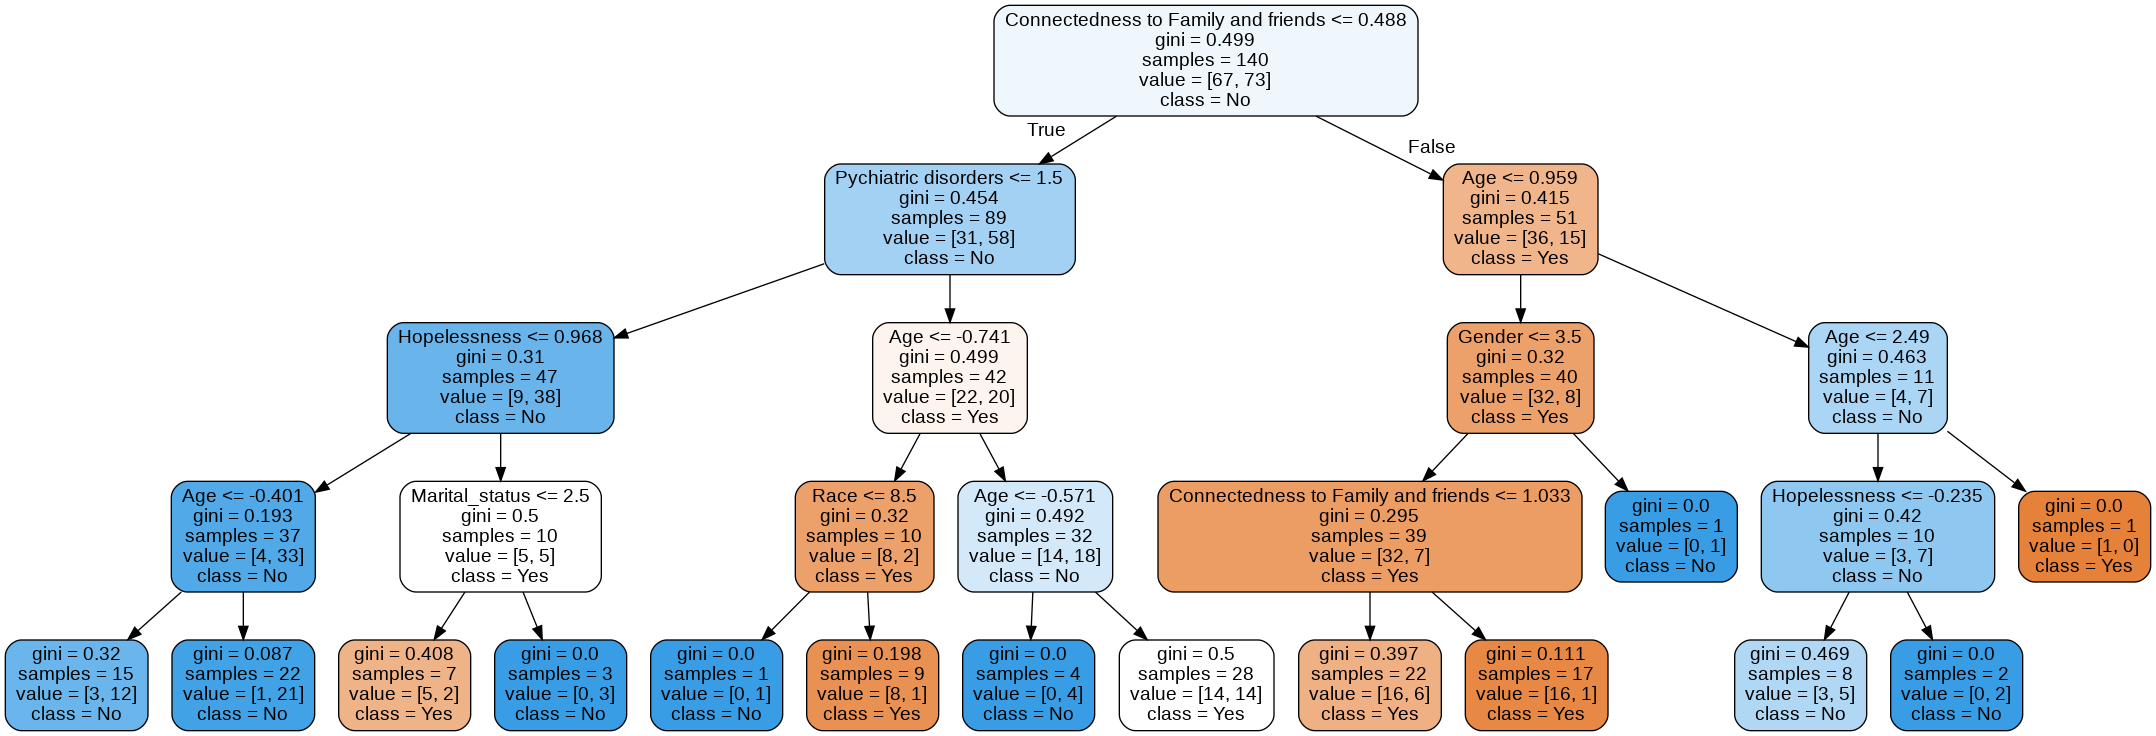

In [ ]:
%ls
! dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image (filename='tree.png')

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions2))

0.5666666666666667


In [ ]:
classifier2=tree.DecisionTreeClassifier(max_depth=3,min_samples_split=2,max_features=2)
classifier2.fit(X_train,y_train)
predictions2=classifier2.predict(X_test)
predictions2

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions2))

0.65


0.6833333333333333
data.csv  sample_data/  tree.dot  tree.png


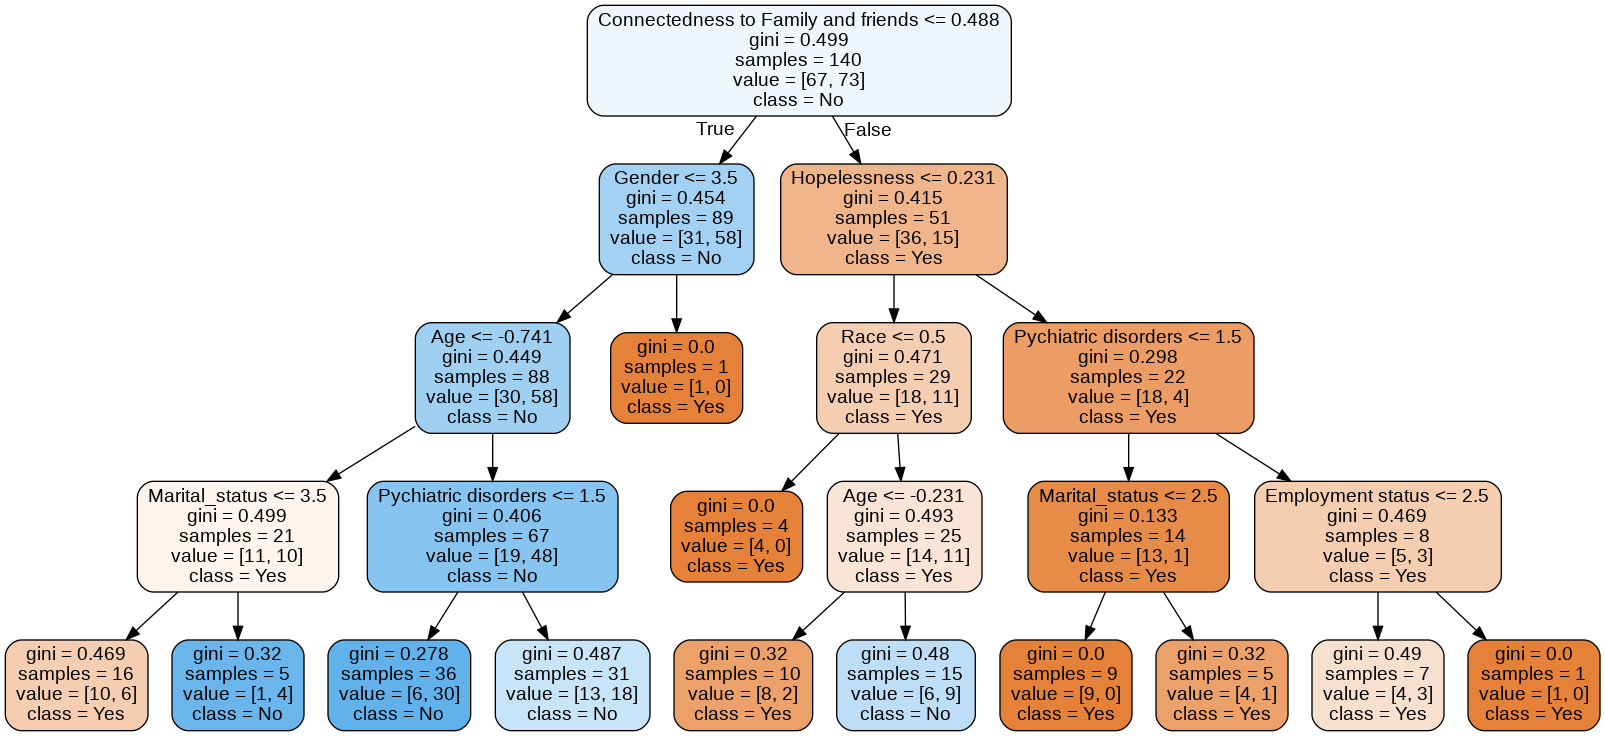

In [ ]:
classifier3=tree.DecisionTreeClassifier(max_depth=4, max_features=3)
classifier3.fit(X_train,y_train)
predictions3=classifier3.predict(X_test)
predictions3

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions3))

from sklearn.tree import export_graphviz

export_graphviz(
    classifier3,
    out_file='tree.dot',
    feature_names=features ,
    class_names=["Yes","No"],
    rounded=True,
    filled=True)

%ls
! dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image (filename='tree.png')

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0) #instance of class by invoking function, builds the model
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
pred=classifier1.predict(X_test)
pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.6333333333333333
